In [ ]:
!pip install fitz

In [ ]:
!pip install PyMuPDF

     |████████████████████████████████| 6.4MB 5.1MB/s 


In [ ]:
import pandas as pd
import numpy as np
import csv
import fitz

In [ ]:
#Gather text for search

pdf_document = "/content/drive/MyDrive/ENFUSE/Historical Content/Historical text on india and ireland.pdf"
doc = fitz.open(pdf_document)
print ("number of pages: %i" % doc.pageCount)
print(doc.metadata)

number of pages: 51
{'format': 'PDF 1.7', 'title': '', 'author': 'Ananya Pratap Singh Chandel', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word for Microsoft 365', 'producer': 'Microsoft® Word for Microsoft 365', 'creationDate': "D:20210512173139+01'00'", 'modDate': "D:20210512173139+01'00'", 'trapped': '', 'encryption': None}


In [ ]:
#Append pagetext by iterating through all the pages
text=""
for i in range(2, (doc.pageCount)):
  page = doc.loadPage(i)
  text += page.getText("text")
print(text)

2. POLITICS: LEARNING THE TRICKS OF THE IMPERIAL SECESSION 
TRADE: IRISH AND INDIAN NATIONALISM IN THE ’30S AND ’40S 
 
Throughout the first half ofthe twentieth century many household names from the Indian 
nationalist movement came to Ireland. Keen friendships developed between a variety of Irish 
and Indian agitators, embracing many of the leading political and literary figures of the day from 
both countries. As a result of their sharedimperial histories, comparisons and connections 
influenced the respective revolutionary activists.V.J. Patel and the Indian–Irish Independence 
LeagueIn the pages of An Phoblacht on 30 July 1932 there appeared an article announcing the 
formation of a group calling itself the ‘Indian–Irish Independence League’. The League would 
operate ‘with a view to work by every possible means to secure the complete independence of 
India and Ireland, and to achieve the closest solidarity between the Irish and the Indianmasses 
in their common struggle against B

In [ ]:
import re
text = re.sub('[^A-Za-z.]+', ' ', text)
text = text.lower()

In [ ]:

##Clean the text
text = text.lower()
print(text)

bad_chars = [';', ':', '!', "*", '"', ',', "'",'(',')',"'s","’s","“","”"]

for i in bad_chars :
    text = text.replace(i, '')
    print(len(text))

text = text.replace("\n"," ")
text = text.replace("—"," ")
text = text.replace("-"," ")

print(text)

In [ ]:
#Break-up into sentences

sentences =[]
sentences = text.split(".")
print(sentences[:5])


[' ', ' politics learning the tricks of the imperial secession trade irish and indian nationalism in the s and s throughout the first half ofthe twentieth century many household names from the indian nationalist movement came to ireland', ' keen friendships developed between a variety of irish and indian agitators embracing many of the leading political and literary figures of the day from both countries', ' as a result of their sharedimperial histories comparisons and connections influenced the respective revolutionary activists', 'v']


In [ ]:
#Get the list of dictionary in array
#############################################################################################

#General code

x = pd.read_csv('/content/drive/MyDrive/ENFUSE/Dictionary/3.csv')
len(x)

for y in range(len(x)):
    print(x.iloc[y,0])

In [ ]:
#Run the search query and store results into pandas dataframe

query_dict = []
query_sent = []
text1 = ""

for r in range(len(sentences)):
    words = []
    words = sentences[r].split(" ")
    for w in range(len(words)):
        #print(w)
        for z in range(len(x)):
            if str(x.iloc[z,0]) == str(words[w]):
                print(x.iloc[z,0]+" in: "+sentences[r])
                query_dict.append(x.iloc[z,0])
                #text1 = sentences[r-1]+". "+sentences[r]+". "+sentences[r]
                query_sent.append(sentences[r-2]+". "+sentences[r-1]+". "+sentences[r]+". "+sentences[r+1])
                
                


In [ ]:
#Checking the data appended
print(len(query_dict))
print(len(query_sent))
#for a in query_dict:
    #print(a)
#for a in query_sent:
    #print(a)

806
806


In [ ]:
#Storing the result in pandas dataframe
result = pd.DataFrame(list(zip(query_dict, query_sent)), columns =['keys', 'values']) 


print(result)
result.drop_duplicates(subset ="values", inplace = True, keep='first')
print(result.head())

        keys                                             values
0      irish   .  .  politics learning the tricks of the imp...
1    ireland   .  .  politics learning the tricks of the imp...
2      irish   .  politics learning the tricks of the imperi...
3      irish  v. j.  patel and the indian irish independence...
4      irish  v. j.  patel and the indian irish independence...
..       ...                                                ...
801  ireland   if those who advocate the use of moral force ...
802    irish   if those who advocate the use of moral force ...
803  ireland   if ever the sword was legitimate it is in a c...
804  ireland   like thomas francis meagher we of today in ir...
805    egypt   but until it comes and while endeavoring to b...

[806 rows x 2 columns]
      keys                                             values
0    irish   .  .  politics learning the tricks of the imp...
2    irish   .  politics learning the tricks of the imperi...
3    irish  v. j.  pat

In [ ]:
# Assigning values based on lengths
content_length = result.apply(lambda row: len(row['values'].split()), axis=1)

In [ ]:
content_length.max()

210

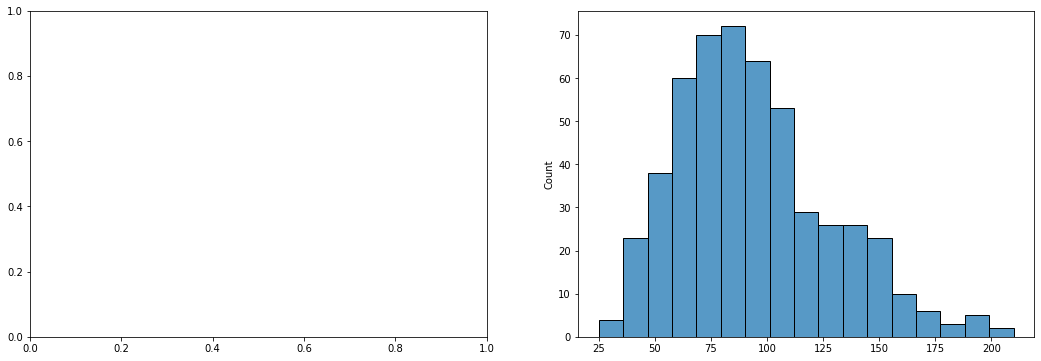

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Identfying average lenght of title and content
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.histplot(content_length, ax=ax[1])
fig.show()

In [ ]:
collate1 = pd.DataFrame(list(zip(result["keys"],result["values"])), columns= ['search_string', 'content'])
collate1.to_feather(r'/content/drive/MyDrive/ENFUSE/Dictionary/search_result1.feather')

In [ ]:
collate1['value_length'] = collate1.apply(lambda row: len(row['content'].split()), axis=1)

In [ ]:
collate1['value_length'].median()

68.0

In [ ]:
#Removing duplicates and collating similars

unique_words =[]
unique_words = result["keys"].unique()
len(unique_words)
for x in unique_words:
    print(x)


textcollate = ""
df = []


for x in range(len(unique_words)):
    df.append(textcollate)
    textcollate = ""
   
    for y in range(len(result)):
        if str(unique_words[x]) == str(result.iloc[y][0]):
            print(result.iloc[y][0])
            textcollate+=str(result.iloc[y][1])
            
df.append(textcollate)
df.pop(0)

#print(len(df))
#print(len(unique_words))
#for a in df:
    #print(a)
#for a in query_sent:
    #print(a)

collate = pd.DataFrame(list(zip(unique_words, df)), columns= ['search_string', 'content'])
print(collate)

In [ ]:
collate['content'] = collate['content'].astype(str)


In [ ]:
collate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   search_string  43 non-null     object
 1   content        43 non-null     object
dtypes: object(2)
memory usage: 816.0+ bytes


In [ ]:
collate.iloc[10][1]

' his last engagement was perhaps the most elaborate and eventful.  a reception was held in his honour in the shelbourne hotel where he was in fact staying'

In [ ]:
collate.to_csv(r'/content/drive/MyDrive/ENFUSE/Dictionary/search_result.csv', index = False)

In [ ]:
collate.to_feather(r'/content/drive/MyDrive/ENFUSE/Dictionary/search_result.feather')